In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_path = 'Results_LP_147.xlsx'
results_df = pd.read_excel(results_path, dtype = str)

In [3]:
results_df = results_df.rename(columns={
    'Hora de inicio': 'start_date',
    'Hora de finalización': 'end_date',
    'Selecciona la asignatura':'subject',
    'Selecciona la pregunta': 'question',
    'Conversación con ChatGPT': 'conversation_ChatGPT',
    '¿Cuántas preguntas has realizado a ChatGPT para obtener la mejor respuesta?': 'numTries_ChatGPT',
    'Conversación con Gemini': 'conversation_Gemini',
    '¿Cuántas preguntas has realizado a Gemini para obtener la mejor respuesta?': 'numTries_Gemini',
    'Conversación con Copilot': 'conversation_Copilot',
    '¿Cuántas preguntas has realizado a Copilot para obtener la mejor respuesta?': 'numTries_Copilot',
    '¿Te ha ayudado ChatGPT a responder a la pregunta?': 'rating_ChatGPT',
    '¿Te ha ayudado Gemini a responder a la pregunta?': 'rating_Gemini',
    '¿Te ha ayudado Copilot a responder a la pregunta?': 'rating_Copilot',
    'Indica tu respuesta a la pregunta':'final_answer'
}).drop(columns=results_df.columns, errors='ignore')

In [4]:
results_df = results_df[results_df['subject']=="Lenguajes de Programación"]

In [5]:
results_df['numTries_ChatGPT'] = results_df['numTries_ChatGPT'].astype(int)
results_df['numTries_Gemini'] = results_df['numTries_Gemini'].astype(int)
results_df['numTries_Copilot'] = results_df['numTries_Copilot'].astype(int)

In [6]:
response_map = {
 'Si. Me ha dado la mejor respuesta' : 'Mejor respuesta',
 'Si. Me ha dado una respuesta correcta, pero menos completa que otras IAs': 'Correcta, pero no tan completa',
 'No. Me ha contestado correctamente, pero no responde a la pregunta que le he hecho': 'No responde a la pregunta',
 'No. Me ha contestado de forma errónea': 'Responde incorrectamente'
}
results_df['rating_ChatGPT_reduced'] = results_df['rating_ChatGPT'].apply(lambda rating: response_map[rating])
results_df['rating_Gemini_reduced'] = results_df['rating_Gemini'].apply(lambda rating: response_map[rating])
results_df['rating_Copilot_reduced'] = results_df['rating_Copilot'].apply(lambda rating: response_map[rating])

In [7]:
results_df.head()

,start_date,end_date,subject,question,conversation_ChatGPT,numTries_ChatGPT,conversation_Gemini,numTries_Gemini,conversation_Copilot,numTries_Copilot,rating_ChatGPT,rating_Copilot,rating_Gemini,rating_ChatGPT_reduced,rating_Gemini_reduced,rating_Copilot_reduced
0,2024-03-15 13:26:03,2024-03-15 13:31:23,Lenguajes de Programación,Pregunta 1,Pregunta 1 (Pregunta de teoría con respuesta d...,3,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"
1,2024-03-15 13:19:25,2024-03-15 13:32:30,Lenguajes de Programación,Pregunta 1,User ¿Qué es la aplicación de una función en...,1,¿Qué es la aplicación de una función en Haskel...,1,¿Qué es la aplicación de una función en Haskel...,3,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
2,2024-03-15 13:25:56,2024-03-15 13:33:42,Lenguajes de Programación,Pregunta 1,"En Haskell, la aplicación de una función se re...",1,"En Haskell, la aplicación de una función se re...",1,La **aplicación de una función** en **Haskell*...,1,"Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Correcta, pero no tan completa","Correcta, pero no tan completa",Mejor respuesta
3,2024-03-15 13:31:31,2024-03-15 13:33:54,Lenguajes de Programación,Pregunta 1,¿Qué es la aplicación de una función en Haskel...,1,¿Qué es la aplicación de una función en Haskel...,1,¿Qué es la aplicación de una función en Haskel...,1,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
4,2024-03-15 13:27:36,2024-03-15 13:34:03,Lenguajes de Programación,Pregunta 1,¿Qué es la aplicación de una función en Haskell?,1,¿Qué es la aplicación de una función en Haskell?,1,¿Qué es la aplicación de una función en Haskell?,1,"Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,Si. Me ha dado la mejor respuesta,"Correcta, pero no tan completa",Mejor respuesta,Mejor respuesta


In [8]:
def numTries_perQuestion(question):
    df = results_df
    if question != 'All':
        df = results_df[results_df['question']==question]
    results = [
        question,
        df['numTries_ChatGPT'].mean(),
        df[df['numTries_Gemini']>0]['numTries_Gemini'].mean(),
        #df['numTries_Gemini'].mean(),
        df['numTries_Copilot'].mean()
    ]
    return results

# Número de preguntas hechas a cada IA (media)

Comentarios:
- Hay 17 alumnos que en Gemini tienen un 0 porque tuvieron problemas con su cuenta de Google

Observaciones preliminares:
- En general, la media de nº de preguntas para todas las IAs es de ~1.26 intentos de pregunta
- Las preguntas de escribir código (5 y 6) son las que menos preguntas de media han requerido (salvo para Copilot)

In [9]:
len(results_df[results_df['numTries_Gemini']==0])

17

In [10]:
rows = [numTries_perQuestion("All")] + [numTries_perQuestion("Pregunta "+str(i)) for i in range(1,7)]
pd.DataFrame(rows,columns=['Question','ChatGPT','Gemini','Copilot']).round(decimals=3)

,Question,ChatGPT,Gemini,Copilot
0,All,1.279,1.262,1.259
1,Pregunta 1,1.360,1.391,1.360
2,Pregunta 2,1.083,1.143,1.125
3,Pregunta 3,1.808,1.522,1.500
4,Pregunta 4,1.125,1.429,1.125
5,Pregunta 5,1.160,1.000,1.200
6,Pregunta 6,1.087,1.050,1.217


In [84]:
colors = {
    'Mejor respuesta':  'gold',
    'Correcta, pero no tan completa': 'silver', 
    'No responde a la pregunta': 'salmon', 
    'Responde incorrectamente': 'orangered'
}

def ia_rating_pieChart(ia, question, ax):
    df = results_df[results_df['question']==question].groupby(['rating_'+ia+'_reduced']).count()
    df.plot.pie(
        y='question', ylabel='', autopct='%1.1f%%', #labeldistance=None,
        title="¿Te ha ayudado %s a responder a la %s?"%(ia, question),
        ax=ax, legend=False, colors=[colors[name] for name in df.index]
    )
    #.legend(bbox_to_anchor=(1,1), loc="lower right", bbox_transform=plt.gcf().transFigure)

# Cuánto ha ayudado cada IA en cada pregunta

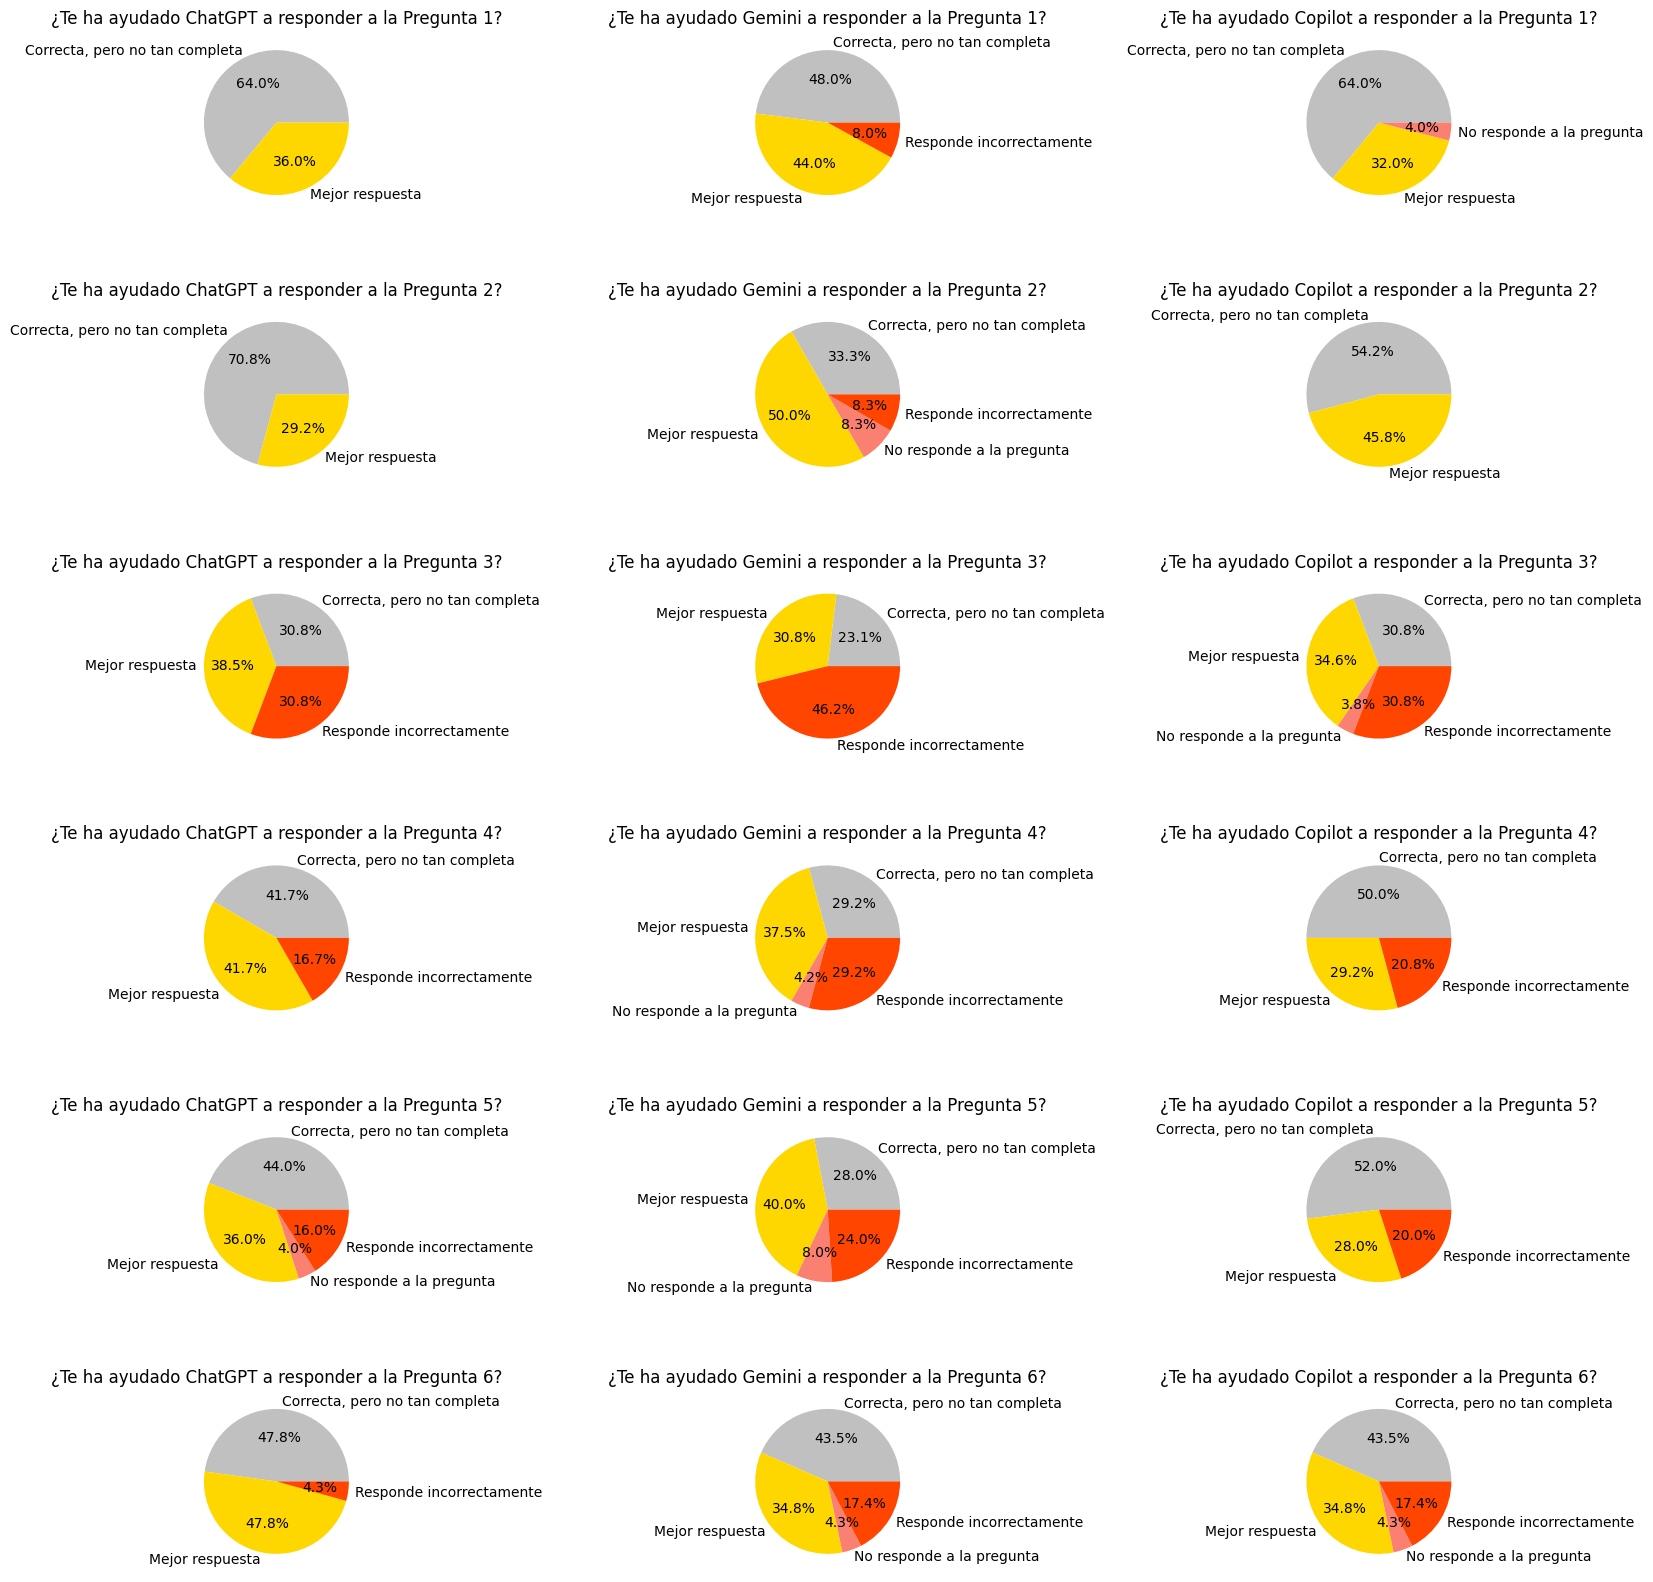

In [85]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(21,20))
fig.subplots_adjust(hspace=0.5, wspace=0.05)

row,col = 0,0
for question in range(1,7):
    for ia in ['ChatGPT','Gemini','Copilot']:
        ia_rating_pieChart(ia, 'Pregunta '+str(question), axes[row,col])
        if col == 2:
            col = 0
            row = row + 1
        else:
            col+=1